In [1]:
!nvidia-smi

Mon Jul 26 16:02:18 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8    26W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
#To Download the Zipped File in Google Colab
!wget 'https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip'
#To unzip it in the Google Colab
!unzip dogImages.zip
!rm dogImages.zip

Streaming output truncated to the last 5000 lines.
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03417.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03418.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03421.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03423.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03424.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03425.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03426.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03428.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03429.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03430.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03431.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03432.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03433.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03434.jpg  
  inflating: dogImages/train/048.Chihua

In [3]:
from tensorflow.keras.applications.xception import Xception

In [4]:
conv_base = Xception(weights='imagenet',
                               include_top=False,
                              input_shape=(299, 299, 3))

83689472/83683744 [==============================] - 2s 0us/step


In [5]:
conv_base.trainable = False

In [6]:
#Adding a densely connected classifier on top of the convolutional base
from tensorflow.keras import models, layers
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(133, activation='softmax'))

In [8]:
#Using ImageDataGenerator to read images from directories
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_dir = '/content/dogImages/train'
validation_dir = '/content/dogImages/valid'

train_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.25,
    horizontal_flip=True,
    fill_mode='nearest').flow_from_directory(
    train_dir,           
    target_size=(299, 299),
    batch_size=25,
    class_mode='categorical')

validation_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    validation_dir,                 
    target_size=(299, 299),     
    batch_size=5,
    class_mode='categorical')

Found 6680 images belonging to 133 classes.
Found 835 images belonging to 133 classes.


In [9]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [10]:
from tensorflow.keras import optimizers
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [11]:
#Fitting the model using a batch generator
history = model.fit(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=15)

Epoch 1/30
100/100 [==============================] - 120s 882ms/step - loss: 4.4009 - accuracy: 0.1144 - val_loss: 2.8796 - val_accuracy: 0.6133
Epoch 2/30
100/100 [==============================] - 88s 881ms/step - loss: 3.1608 - accuracy: 0.3359 - val_loss: 1.6840 - val_accuracy: 0.6933
Epoch 3/30
100/100 [==============================] - 88s 875ms/step - loss: 2.3895 - accuracy: 0.4700 - val_loss: 1.1423 - val_accuracy: 0.7200
Epoch 4/30
100/100 [==============================] - 87s 869ms/step - loss: 1.9183 - accuracy: 0.5496 - val_loss: 0.7305 - val_accuracy: 0.8267
Epoch 5/30
100/100 [==============================] - 88s 877ms/step - loss: 1.6973 - accuracy: 0.5896 - val_loss: 0.6050 - val_accuracy: 0.8800
Epoch 6/30
100/100 [==============================] - 89s 890ms/step - loss: 1.5399 - accuracy: 0.6124 - val_loss: 0.5115 - val_accuracy: 0.8400
Epoch 7/30
100/100 [==============================] - 89s 885ms/step - loss: 1.4533 - accuracy: 0.6367 - val_loss: 0.3749 - val_a

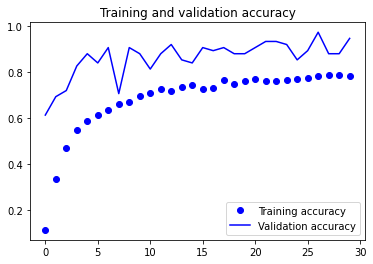

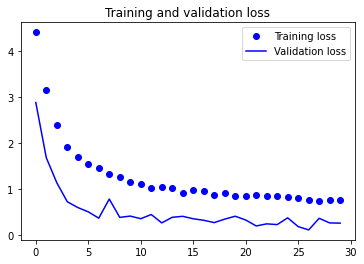

In [12]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [13]:
# Setup model for fine tuning
def setup_model(model, trainable):
    # Freeze the un-trainable layers of the model base
    for layer in model.layers[:(len(model.layers) - trainable)]:
        layer.trainable = False

    for layer in model.layers[(len(model.layers) - trainable):]:
        layer.trainable = True

    model.compile(
        loss='categorical_crossentropy',
        # Slower training rate for fine-tuning
        optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
        metrics=['accuracy']
    )

# Setup model to retrain our top layer plus block 13 and 14 of Xception
setup_model(model, 19)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [15]:
#Fitting the model using a batch generator
history = model.fit(train_generator,
                              steps_per_epoch=100,
                              epochs=60,
                              validation_data=validation_generator,
                              validation_steps=15)

Epoch 1/60
100/100 [==============================] - 202s 2s/step - loss: 1.0313 - accuracy: 0.7364 - val_loss: 0.2059 - val_accuracy: 0.9333
Epoch 2/60
100/100 [==============================] - 195s 2s/step - loss: 0.8550 - accuracy: 0.7633 - val_loss: 0.3619 - val_accuracy: 0.8933
Epoch 3/60
100/100 [==============================] - 194s 2s/step - loss: 0.7763 - accuracy: 0.7820 - val_loss: 0.3776 - val_accuracy: 0.8933
Epoch 4/60
100/100 [==============================] - 195s 2s/step - loss: 0.7406 - accuracy: 0.7852 - val_loss: 0.2573 - val_accuracy: 0.9200
Epoch 5/60
100/100 [==============================] - 193s 2s/step - loss: 0.7063 - accuracy: 0.8065 - val_loss: 0.3805 - val_accuracy: 0.9200
Epoch 6/60
100/100 [==============================] - 194s 2s/step - loss: 0.7195 - accuracy: 0.8032 - val_loss: 0.2596 - val_accuracy: 0.8800
Epoch 7/60
100/100 [==============================] - 193s 2s/step - loss: 0.6605 - accuracy: 0.8052 - val_loss: 0.1894 - val_accuracy: 0.9333

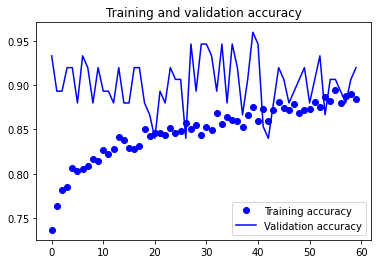

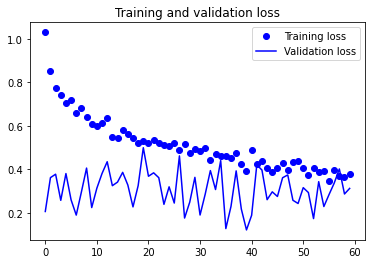

In [16]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

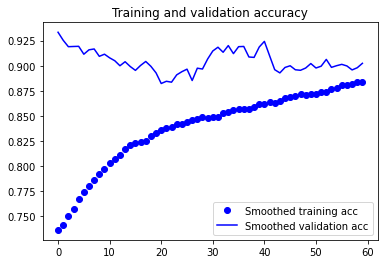

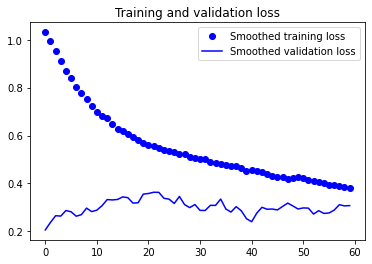

In [17]:
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

plt.plot(epochs, smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs, smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs, smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [18]:
test_dir = '/content/dogImages/test'
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    test_dir,                 
    target_size=(299, 299),
    batch_size=20)
model.evaluate(test_generator, steps=50)

Found 836 images belonging to 133 classes.
50/50 [==============================] - 17s 317ms/step - loss: 0.2957 - accuracy: 0.9151


[0.29567641019821167, 0.9150717854499817]

In [19]:
model.save('Dog_Breed_Identification.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [45]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Display
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm

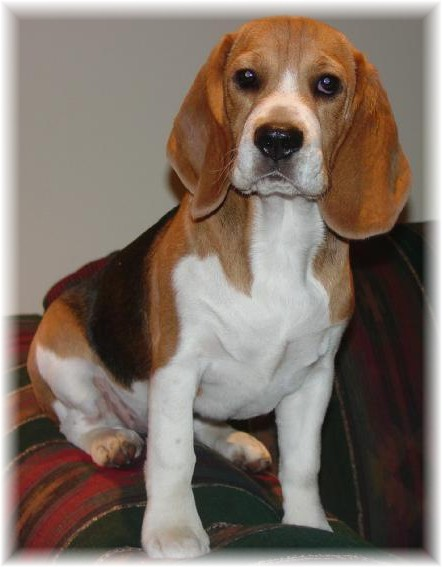

In [47]:
model_builder = keras.applications.xception.Xception
img_size = (299, 299)
preprocess_input = keras.applications.xception.preprocess_input
decode_predictions = keras.applications.xception.decode_predictions

last_conv_layer_name = "block14_sepconv2_act"

# The local path to our target image
img_path = '/content/dogImages/test/016.Beagle/Beagle_01196.jpg'#keras.utils.get_file(
#    "african_elephant.jpg", "https://i.imgur.com/Bvro0YD.png"
#)

display(Image(img_path))

In [48]:
def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

40960/35363 [==================================] - 0s 0us/step
Predicted: [('n02088364', 'beagle', 8.39957)]


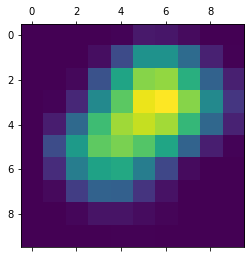

In [49]:
# Prepare image
img_array = preprocess_input(get_img_array(img_path, size=img_size))

# Make model
model = model_builder(weights="imagenet")

# Remove last layer's softmax
model.layers[-1].activation = None

# Print what the top predicted class is
preds = model.predict(img_array)
print("Predicted:", decode_predictions(preds, top=1)[0])

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()

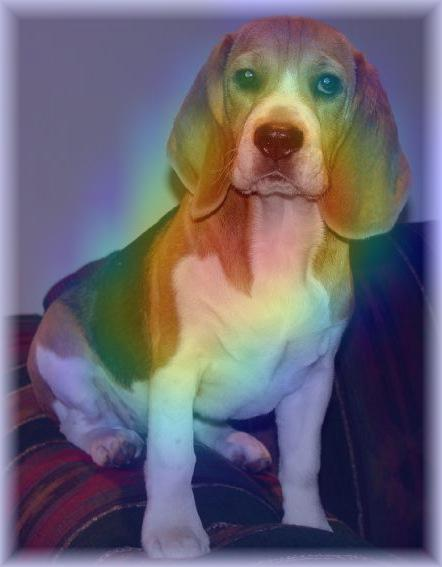

In [50]:
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))


save_and_display_gradcam(img_path, heatmap)

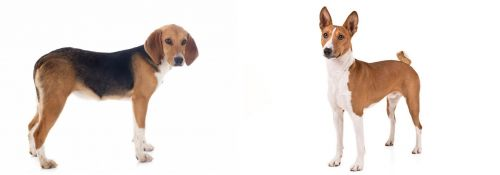

Predicted: [('n02089973', 'English_foxhound', 7.504072), ('n02089867', 'Walker_hound', 6.509095)]


In [58]:
#costume image with two very similar dog from the internet
img_path = '/content/basenji-851412.jpg'

display(Image(img_path))

# Prepare image
img_array = preprocess_input(get_img_array(img_path, size=img_size))

# Print what the two top predicted classes are
preds = model.predict(img_array)
print("Predicted:", decode_predictions(preds, top=2)[0])

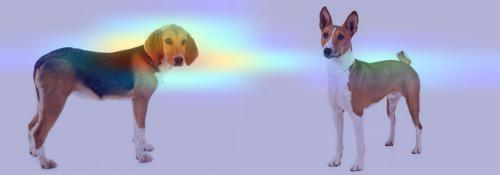

In [59]:
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=14)
#Basenji 
save_and_display_gradcam(img_path, heatmap)

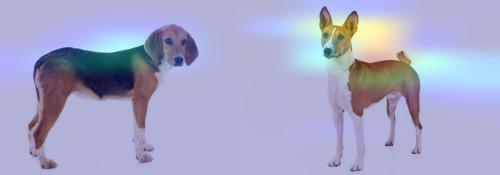

In [60]:
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=16)
#Beagle
save_and_display_gradcam(img_path, heatmap)